# Сборный проект 1 - исследование игровой индустрии

**Описание проекта:**<br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).<br>

**Описание данных:**<br>
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры <br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
<br>

 **Цель исследования** -  выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

 **Шаги исследования:**
- первичный анализ данных
- предобработка данных 
- исследовательский анализ: пределение факторов, влияющих на продажи, определение лидеров продаж
- составление портретов пользователей (самые популярные жанры и платформы, факторы популярности)
- проверка выдвинутых гипотез 
- общий вывод по проделанной работе

# Перейдем к исследованию

## Импортируем библиотеки и посмотрим на данные, изучим общую информацию.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('/datasets/games.csv', sep='\t')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


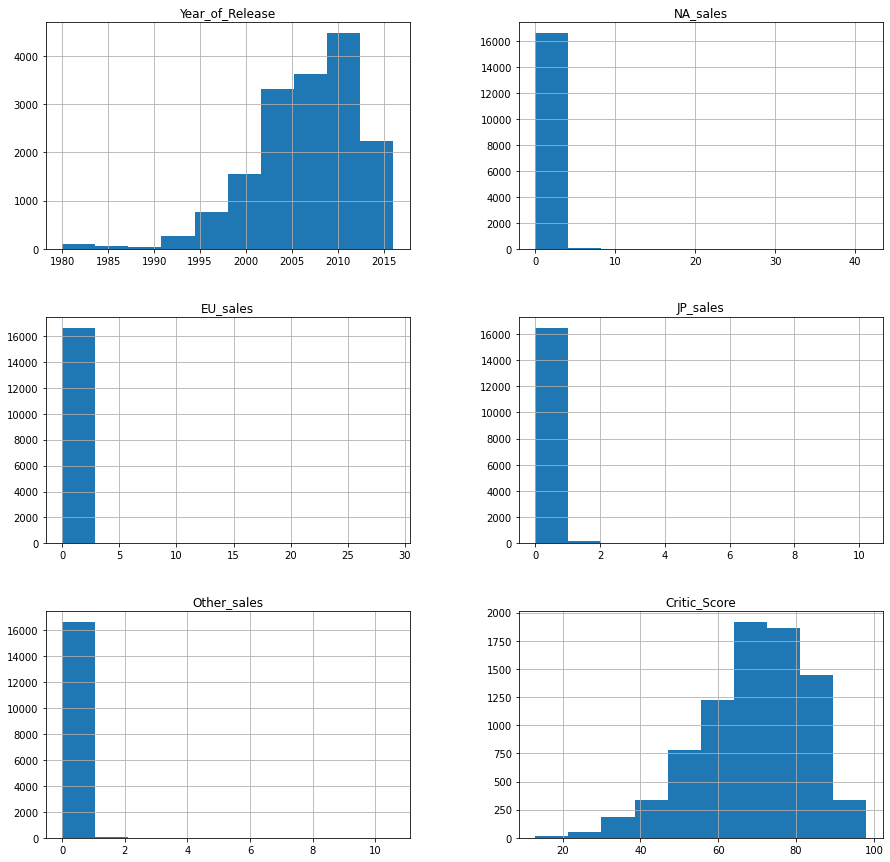

In [4]:
data.hist(figsize=(15, 15));

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
print('Количество строк:', data.shape[0])
print('Количество стобцов:',data.shape[1])

Количество строк: 16715
Количество стобцов: 11


In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Изучив предварительную информацию, можно заметить что год релиза игры необходимо перевести в целочисленый формат,также заметны пропуски в названии, годе выпуска игры, жанре и в оценке рейтингов в т.ч. рейтингово агенства, обычных пользователей и критиков.

## Подготовим данные к исследованию

### Для начала названия столбцов приведем к единому нижнему регистру и переведем данные в корректный формат.

In [8]:
data.columns = data.columns.str.lower()

### Проверим пропуски в даных и обработаем их

In [9]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (15,5), rot = 0, legend = False, fontsize = 16)
            .set(xlabel='%', ylabel='Названия столбцов', title=('Процент пропусков в данных'))   
        );
        print(data.isna().sum().sort_values())
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [10]:
# check
# пропущенные значения бары + значения

def pass_value_barh(df):
    
    fig, ax = plt.subplots(figsize=(19, 6))
    
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19,6), legend=False, fontsize=16, ax = ax)
            .set_title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        );
#         plt.grid(visible=True, color='grey', linestyle='--', linewidth=0.5, alpha=0.8)
        plt.xlim(0, 100)
    
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.1,
                     str(round((i.get_width()), 1)),
                     fontsize=14, 
                     color='black')
    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')

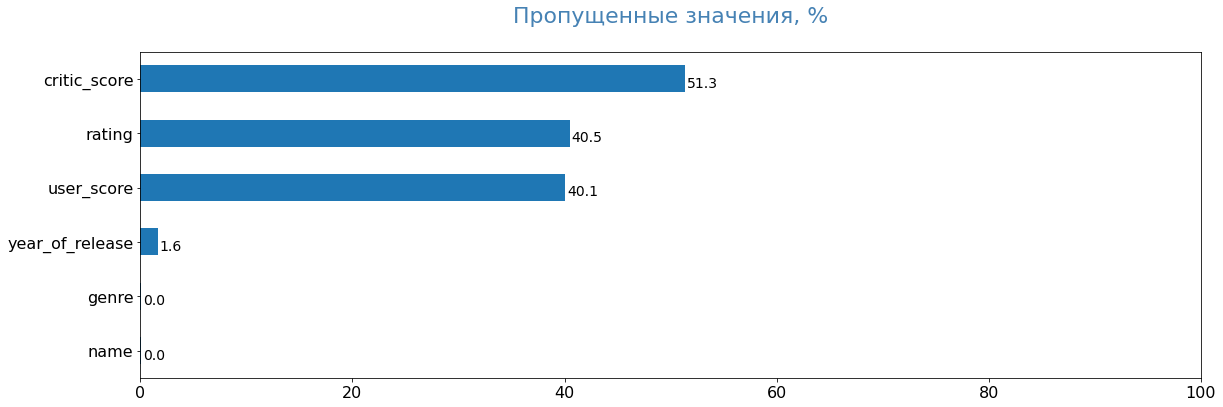

In [11]:
pass_value_barh(data)

In [12]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пойдем по возрастающей. С именами всё понятно, эти данные не восстановить. К тому же здесь остутствует еще и жанр игры. Два по цене одного. Удаляем

In [13]:
data.dropna(subset = ['name'], inplace=True)

Изначально была указана проблема с пропусками в данных за 2016г. Проверим, возможно оставшиеся пропуски находятся именно там.

In [14]:
data[data['year_of_release'] == 2016].isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       270
user_score         206
rating             222
dtype: int64

Теория не подтвердилась, возвращаемся обратно. <br>Переходим к году выпуска игр. Единственный вариант искать год вручную, по нашим данным восстановить его не выйдет. Так же удаляем. И переводим в целочисленный формат

In [15]:
data.dropna(subset = ['year_of_release'], inplace=True)

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int)

Остались пропуски с оценками и рейтингами. Рассмотрим подробнее

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [18]:
len(data[data['user_score'] == 'tbd'])

2376

Помимо цифровых значений и пропусков, замечена категория TBD. Она расшифровывается как - To Be Determined, то есть «Будет определено». Следовательно игра либо находится на оценке, либо еще не оценена. Опять же значение слишком большое и отбросить просто так мы его не можем. Отсутствие оценки тоже оценка. Здесь два варианта - можно заменить пропуски на ТБД или ТБД на пропуски и считать, что в обоих вариантах у игры нет оценки. В нашем случае заменим на NaN. Также строка является типом object, изменим на число с плавающей точкой

In [19]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [20]:
data['user_score'] = data['user_score'].astype(float)

In [21]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Перед нам рейтинг возрастных ограничений, по значениям все в порядке. Если бы было пропущено одно из значений, как раз это и были бы наши пропуски. Но категорий еще много, например могут буть категории игр где "присутствует кровь","для взрослых" и т.д. Поэтому вместо пропусков добавим категорию "no rating" для дальнейшего корректного анализа. Ведь мы точно не знаем была проблема с выгрузкой других категорий или это неоцененные игры.

In [22]:
data['rating'] = data['rating'].fillna('no_rating')

In [23]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Числовые столбцы, содержащие NaN значения, по умолчанию хранятся в виде чисел с плавающей запятой (даже если все остальные числа являются целыми числами) - это из-за ограничений на приведение типов в pandas. Поэтому оценки критиков в целые числа мы не переводим

С цифрами все впорядке, текстовых или иных обозначений не обнаружено. Пропуск оценки говорит нам о том, что либо игра не была оценена, либо произошел какой-то сбой при загрузке данных.<br> <br> 
**Итог**:<br>
По-хорошему обратиться к сайнтистам для повторной выгрузки, потому что включая все оценки(пользовательские, критиков и агенства), у нас отсутствуют более 50% тех или иных данных. Следовательно удалять эти данные мы не можем и не будем. Если приравнять хорошую игру к 0 - это испортит нам весь анализ. Поэтому будем считать, что  игра не была оценена.

### Добавим новый столбец 'world_sales' с продажам игры по миру

In [24]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data[data['world_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,no_rating,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,no_rating,0.0


Игры которые не были проданы и не были оценены. Нам они не понадобятся, т.к. наша цель найти успешные проекты, а эти игры без продаж и оценок будут просто баластом

In [26]:
data = data[data['world_sales'] != 0]

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Проверим наличие дубликатов

In [27]:
data.duplicated().sum()

0

Дубликаты не найдены, переведем жанр, название игры и платформу в нижний регистр и проверим еще раз.

In [28]:
data['name'] = data.name.str.lower()

In [29]:
data['genre'] = data.genre.str.lower()

In [30]:
data['platform'] = data.platform.str.lower()

In [31]:
data.duplicated().sum()

0

Теперь посмотрим неявные дубликаты например по имени, платформе и году релиза игры

In [32]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

1

Обнаружен неявный дубликат, посмотрим на эту игру.

In [33]:
data[data.duplicated(['name', 'platform', 'year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [34]:
data[(data['name'] == 'madden nfl 13') & (data['platform'] == 'ps3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Информации в интернете о продаж я найти не смог, поэтому дубликат обрабатывать не будем, все строки такие же кроме продаж. Продажи не складываем, т.к. возможно была допущена ошибка из выгрузки. Просто удалим дубликат.

In [35]:
data = data.drop(index= 16230 ) 

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16441 non-null  object 
 11  world_sales      16441 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Дубликаты не обнаружены

### Итог по предобработке данных:

Мы удалили столбцы с пропускам в названии, жанре и где отсутствовал год релиза игры. С названием и жанром совпали два значения и мы их убрали - так как обработать эти данные невозможно,это будет для нас мертвый груз. Год релиза игры немного сложнее - как никак гейминг не стоит на месте популярный жанр может меняться год от года(как пример). Поэтому для нас это тоже обуза. Итого от исходных данных нам пришлось убрать 1,63%. Значение в пределах нормы. Максимально можно убрать 5-10% на этом этапе.

## Проведем исследовательский анализ данных

### Посмотрим общую картину данных 

In [37]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,7982.000000,7462.000000,16441.000000
mean,2006.485737,0.264061,0.145956,0.078501,0.047602,68.992608,7.126548,0.536121
std,5.875880,0.818445,0.506759,0.311127,0.188021,13.920049,1.499429,1.558911
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [38]:
(
    data[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'world_sales']]
    .quantile([0.01, 0.02, 0.5, 0.99, 0.9988])
    .style.format("{:,.2f}")
)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,world_sales
0.01,"1,987.00",0.00,0.00,0.00,0.00,0.01
0.02,"1,993.00",0.00,0.00,0.00,0.00,0.01
0.5,"2,007.00",0.08,0.02,0.00,0.01,0.17
0.99,"2,016.00",2.81,1.95,1.28,0.64,5.48
0.9988,"2,016.00",9.02,5.74,4.00,1.94,18.76


### Проанализируем частоту выхода игр

In [39]:
len(data[data.year_of_release < data.year_of_release.quantile(.009)])

136

In [40]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1425
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [41]:
data[data.year_of_release <= 1993]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,no_rating,20.62
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,no_rating,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...
14610,doom,pc,1992,shooter,0.02,0.00,0.00,0.00,85.0,8.2,M,0.02
14621,simcity,pc,1988,simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+,0.03
15692,empire deluxe,pc,1992,strategy,0.02,0.00,0.00,0.00,NaN,NaN,no_rating,0.02
15957,strongest tokyo university shogi ds,ds,1985,action,0.00,0.00,0.02,0.00,NaN,NaN,no_rating,0.02


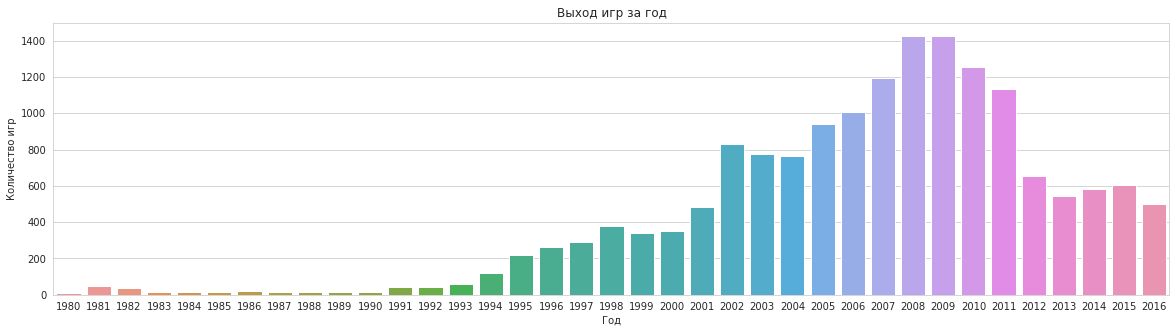

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 5))
sns.countplot(data = data, x='year_of_release')\
.set(title='Выход игр за год',
     ylabel='Количество игр', 
     xlabel = 'Год');

На графике видно отчетливо стабильный рост новых игровых продуктов из года в год до 2009г. По известным событиям и кризиса 2008-2009г. Многие люди потеряли свои финансы (в особенности США), консоли упали в продажах, многие студии разработчики игр были на грани банкротства или вовсе обанкротились. Как пример можно взять на тот момент крупнейшего издателя игр Electronic Arts (FIFA, серия Need For Speed) знакомы многим. В октябре 2008 года цена акций EA упала на 75% с 50 до 15 долларов и оставалось на этом уровне ещё пять лет. Акции Activision Blizzard, Take-Two, THQ, Gamestop и Nintendo провалились на 50%. Шло массовое сокращение разработчиков, поэтому в 8-9 году готовые проекты выпустили, а дальше шел лишь спад. В среднем готовый продукт поступает на рынок после окончания его разработки в течение полугода-года. За это время игра проходит тестирование и готовится к продаже. 

### Выделим самые популярные игровые платформы и определим их жизненный цикл


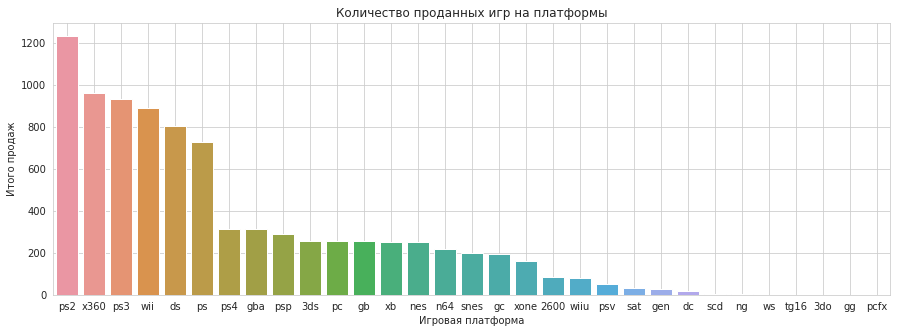

In [43]:
platform = data.pivot_table(index='platform',
                            values='world_sales',
                            aggfunc='sum')\
.sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Количество проданных игр на платформы')
sns.barplot(x=platform.index, y=platform['world_sales'])
plt.ylabel('Итого продаж')
plt.xlabel('Игровая платформа')
plt.grid(True);

Выделяется целая группа с наибольшим количеством проданных игр на платформы: PS2, Xbox360, PS3, Wii, DS и PS. Далее уже идет следующая группа.

Цикл жизни 12 лет


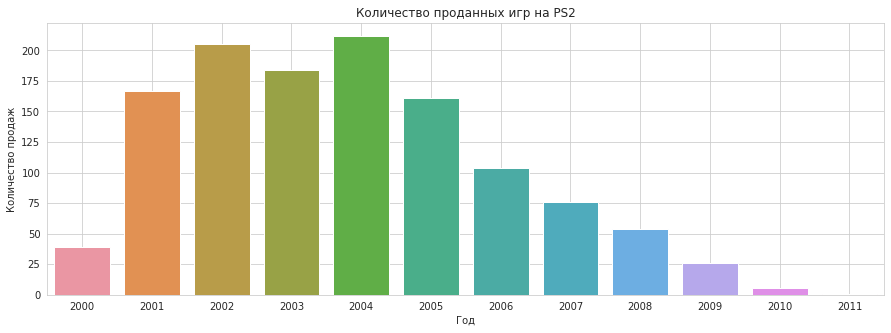

In [44]:
platform_ps2 = data[data['platform']=='ps2'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Количество проданных игр на PS2')
sns.barplot(x=platform_ps2.index, y=platform_ps2['world_sales'])
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_ps2.index), 'лет')

Цикл жизни 12 лет


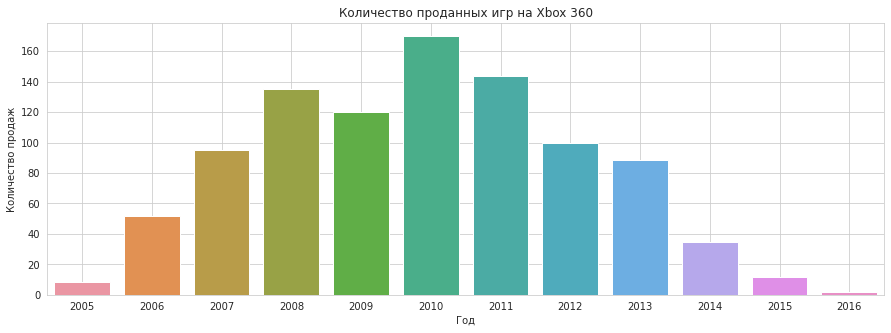

In [45]:
platform_x360 = data[data['platform']=='x360']\
.pivot_table(index='year_of_release',
             values='world_sales',
             aggfunc='sum')\
.sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Количество проданных игр на Xbox 360')
sns.barplot(x=platform_x360.index, y=platform_x360['world_sales'])
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_x360.index), 'лет')

Цикл жизни 11 лет


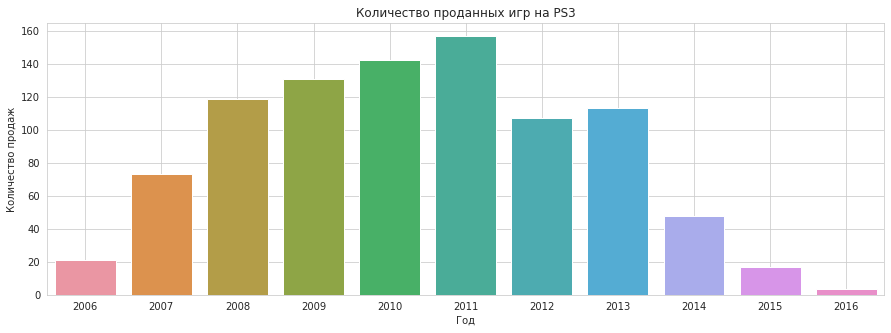

In [46]:
platform_ps3 = data[data['platform']=='ps3']\
.pivot_table(index='year_of_release',
             values='world_sales', 
             aggfunc='sum')\
.sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Количество проданных игр на PS3')
sns.barplot(x=platform_ps3.index, y=platform_ps3['world_sales'])
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_ps3.index), 'лет')

Цикл жизни 11 лет


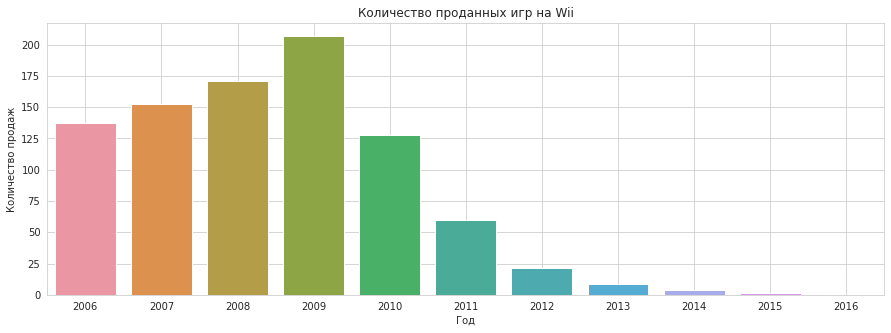

In [47]:
platform_wii = data[data['platform']=='wii']\
.pivot_table(index='year_of_release',
             values='world_sales', 
             aggfunc='sum')\
.sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Количество проданных игр на Wii')
sns.barplot(x=platform_wii.index, y=platform_wii['world_sales'])
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_wii.index), 'лет')

Цикл жизни 11 лет


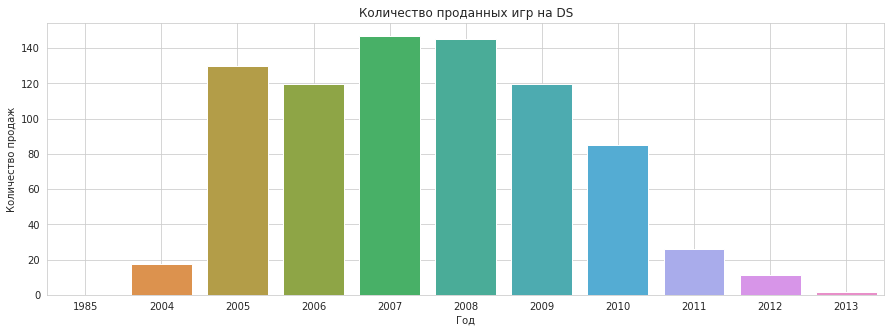

In [48]:
platform_ds = data[data['platform']=='ds']\
.pivot_table(index='year_of_release', 
             values='world_sales', 
             aggfunc='sum')\
.sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x=platform_ds.index, y=platform_ds['world_sales'])
plt.title('Количество проданных игр на DS')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_ds.index), 'лет')

По официальным данным консоль Nintendo DS была анонсирована в 2004 году.Обнаружен выброс в 1985 году проверим что там.

In [49]:
data[(data['name']=='strongest tokyo university shogi ds')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


Действительно эта игра не имеет отношения к платформе Nintendo DS. Удаляем и построим новый график

In [50]:
data = data[data['name'] != 'strongest tokyo university shogi ds']

Цикл жизни 10 лет


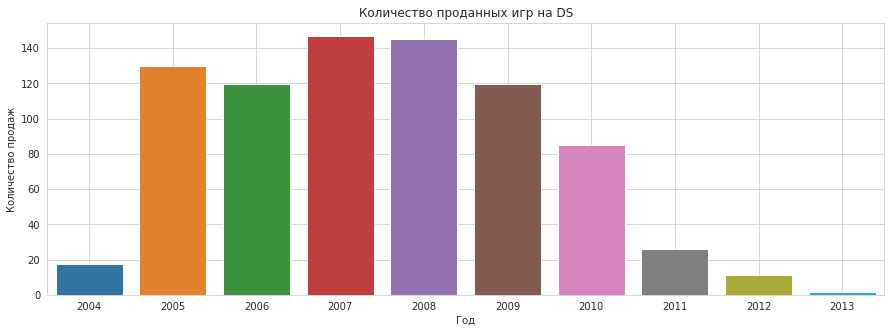

In [51]:
platform_ds = data[data['platform']=='ds'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(x=platform_ds.index, y=platform_ds['world_sales'])
plt.title('Количество проданных игр на DS')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_ds.index), 'лет')

Цикл жизни 10 лет


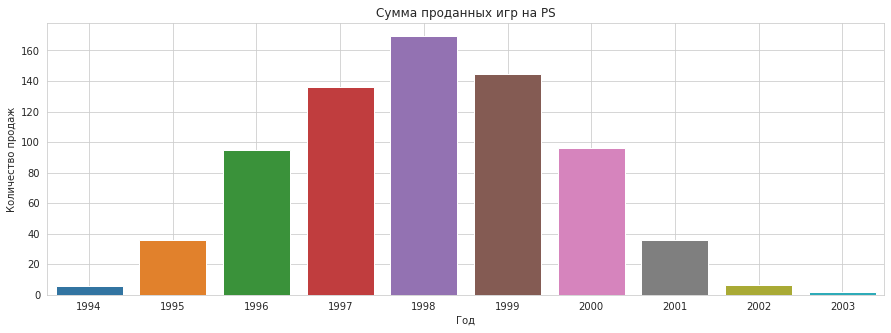

In [52]:
platform_ps = data[data['platform']=='ps'].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Сумма проданных игр на PS')
sns.barplot(x=platform_ps.index, y=platform_ps['world_sales'])
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.grid(True);
print('Цикл жизни', len(platform_ps.index), 'лет')

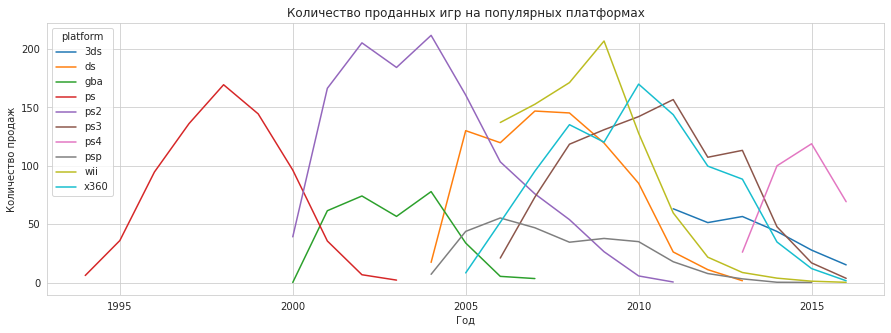

In [53]:
#Общий график продаж
best_platforms = data.groupby('platform').sum()['world_sales'].sort_values(ascending=False).index.values[:10]
best_data = data[data.platform.isin(best_platforms)]
best_data = best_data.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
best_data.plot(figsize=(15,5))
plt.title('Количество проданных игр на популярных платформах')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.show()

Посмотрим также отдельно линейку Xbox и PlayStation. Они являются гигантами консольного рынка.

world_sales    1372.13
dtype: float64

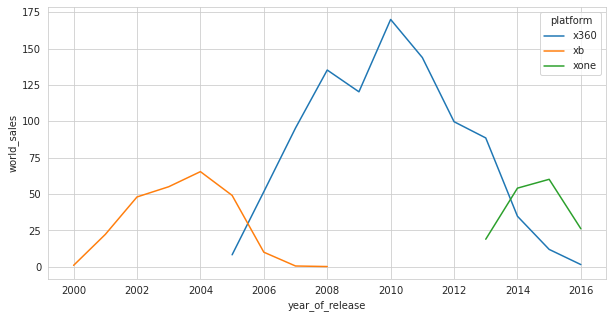

In [54]:
xbox_list = ['x360', 'xb', 'xone']
xbox_sales = pd.DataFrame(data.query('platform in @xbox_list'))

xbox_sales_all_time = xbox_sales.groupby(['platform', 'year_of_release'])[['world_sales']].sum()
plt.figure(figsize=(10,5))
sns.lineplot(x='year_of_release',y='world_sales', hue='platform', data=xbox_sales_all_time.reset_index());
display(xbox_sales_all_time.sum());

world_sales    3206.61
dtype: float64

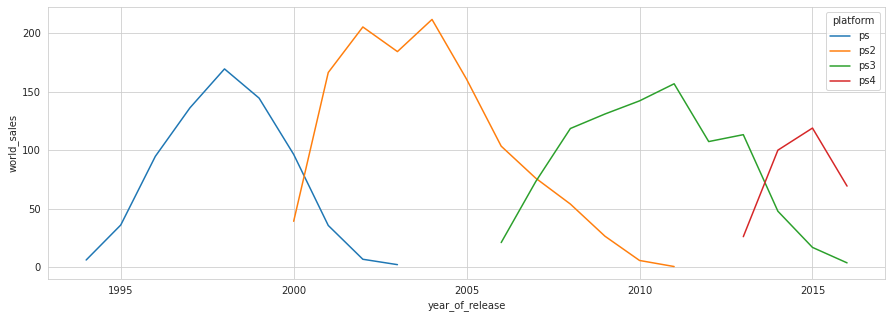

In [55]:
ps_list = ['ps4', 'ps3', 'ps2', 'ps']
ps_sales = pd.DataFrame(data.query('platform in @ps_list'))

ps_sales_all_time = ps_sales.groupby(['platform', 'year_of_release'])[['world_sales']].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x='year_of_release',y='world_sales', hue='platform', data=ps_sales_all_time.reset_index());
display(ps_sales_all_time.sum())

world_sales    3206.61
dtype: float64


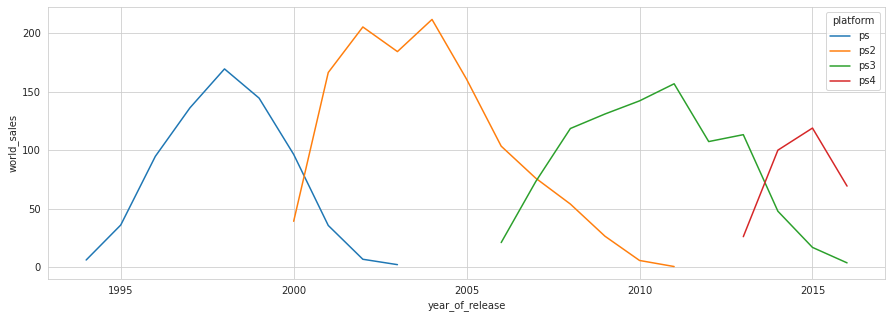

In [56]:
ps_list = ['ps4', 'ps3', 'ps2', 'ps']
ps_salles = pd.DataFrame(data.query('platform in @ps_list'))

ps_salles_all = ps_salles.groupby(['platform', 'year_of_release'])[['world_sales']].sum()
plt.figure(figsize=(15,5))
sns.lineplot(x='year_of_release',y='world_sales', hue='platform', data=ps_salles_all.reset_index());
print(ps_salles_all.sum())

В среднем цикл жизни самых популярных "игровых машин" составил от 8 до 11 лет. Это с учетом перехода со старого поколения на новое (что видно на каждом графике) - в первые и последние 2-3 года. Как пример самый популярный издатель Sony и их консоли PS4 появляется в 2013 году, PS3 появляется в 2006г, PS2 в 2000-ом, а PS-1 в 1994. Можно заметить, что главный консольный разработчик выпускает новый продукт каждые 6 лет, но это не является приговором для предыдущих моделей. Т.е. поддержка продолжается, игры стабильно выходят еще 3-4 года как минимум.

### Возьмем данный за актуальный период для дальнейшего анализа. Будем оринтироваться на гигантов консольного рынка. В 2013г. Sony и Microsoft выпустили консоли нового поколения, будем считать начальной отметку - 13 год

In [57]:
new_era = data[data['year_of_release'] >= 2013]

In [58]:
new_era.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,world_sales
platform,
ps4,314.14
ps3,181.43
xone,159.32
3ds,143.25
x360,136.80
wiiu,64.63
pc,39.43
psv,32.99
wii,13.66


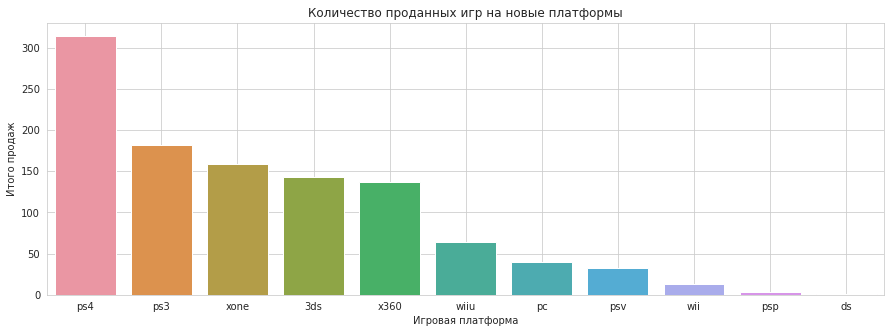

In [59]:
platform_new_era = new_era.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('Количество проданных игр на новые платформы')
sns.barplot(x=platform_new_era.index, y=platform_new_era['world_sales'])
plt.ylabel('Итого продаж')
plt.xlabel('Игровая платформа')
plt.grid(True);
platform_new_era

Теперь посмотрим в динамике на продажи

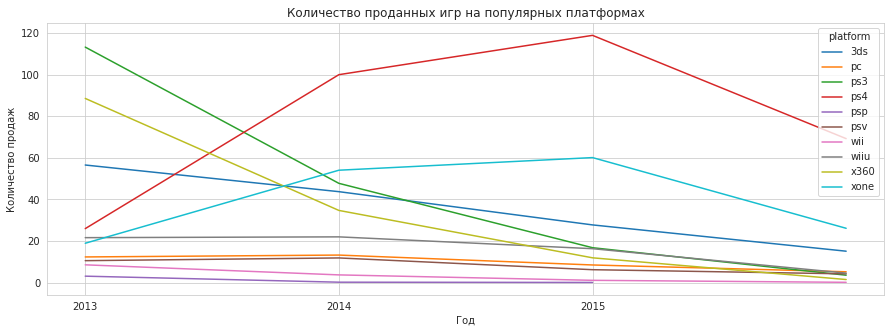

In [60]:
best_platforms = new_era.groupby('platform').sum()['world_sales'].sort_values(ascending=False).index.values[:10]
best_data = new_era[new_era.platform.isin(best_platforms)]
best_data = best_data.pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
best_data.plot(figsize=(15,5))
plt.title('Количество проданных игр на популярных платформах')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.xticks(np.arange(2013,2016))
plt.show()

In [61]:
#Теперь посмотрим в цифрах
best_data

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2013,56.57,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Так как по условиям у нас не полные данные за 2016г.(скорее всего он не закончен на момент отчета). Построим теперь график без "текущего" года и посмотрим на продажи там

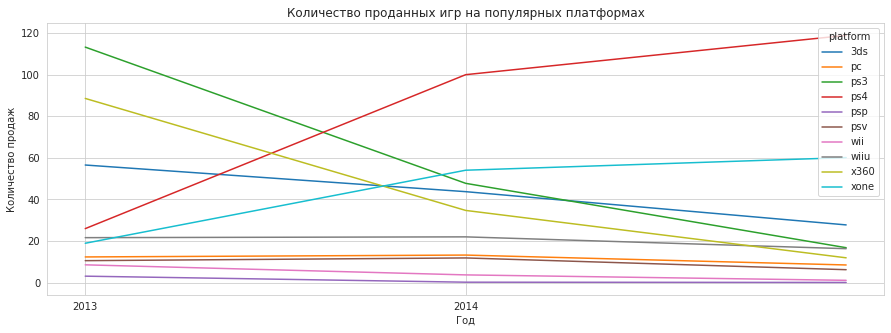

platform,3ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,
2013,56.57,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [62]:
best_platforms = new_era.groupby('platform').sum()['world_sales'].sort_values(ascending=False).index.values[:10]
best_data_2 = new_era[new_era.platform.isin(best_platforms)]
best_data_2 = best_data_2[best_data_2['year_of_release'] < 2016].pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
best_data_2.plot(figsize=(15,5))
plt.title('Количество проданных игр на популярных платформах')
plt.ylabel('Количество продаж')
plt.xlabel('Год')
plt.xticks(np.arange(2013, 2015))
plt.show()
display(best_data_2)

Playstation снова в лидерах. Новенький xbox в первый год тоже начал с хорошими продажами. Здесь уже видно как падает портативный гейминг на примере консолей Nintendo 3DS. Единственный конкрутент Нинтендо это - Wii U от той же компании, однако  консоль быстро устарела и не смогла запасть в сердца пользователей как 3DS. 


**Категорию PC** вообще сложно оценивать, так как это "конструктор", который можно постоянно модернизировать, но по сравнению с консолями современный пк (с учетом перефирии, и самого компьютера) обойдется в 3-4 раза дороже той же PS4. Комплектующие для ПК подорожали, продажи просели в 2015. И в отличии от консолей, для ПК системные требования растут как дрожжах если не каждые полгода, то раз в год как минимум. А консоли стабильно могут выдержать до 12 лет.
 
**Рынок игр для домашних консолей.** Xbox One и PS4 стабильно рвутся вперед по продажам, это наиболее перспективные и прибыльные рынки. Тем более через год выйдет PS4 Pro и XOne S, что повлечет еще рост продаж, ведь консоли будут на той же платформе :). С выходом Про и S версии поддержка консолей предыдущего поколения прекратится, т.е. новые игры и обновления ПО выходить больше не будут. PS3 и Xbox360 не имеют потенциала и еще больше потеряют в продажах.

**Про портативный гейминг**. PSP, Wii(предшественник Wii U) и PS Vita для новой эпохи уже устарели, и быстро теряли в продажах. Игры на данных платформах нельзя рекомендовать к закупке. Потенциал можно рассмотреть у 3DS, продажи хоть и упали, но эта консоль способна приносить прибыль и является лидером в портативном гейминге. Продажи Wii U остаются на достойном уровне Nintendo уже планирует представить в ближайший год её замену и в отличии от Sony и Microsoft платформа будет иная и игры будут работать на другом ПО, что может повлечь за собой залежи на складах компании.

***Рекомендуются к инвестированию платформы:***
- PS4
- XOne
- 3DS

***Не рекомендуются к инвестированию платформы:***
- PSP
- PSV
- X360
- PS3 

In [63]:
# check
np.arange(2013, 2015)

array([2013, 2014])

### Построим ящик с усами и проанализируем по новым данным

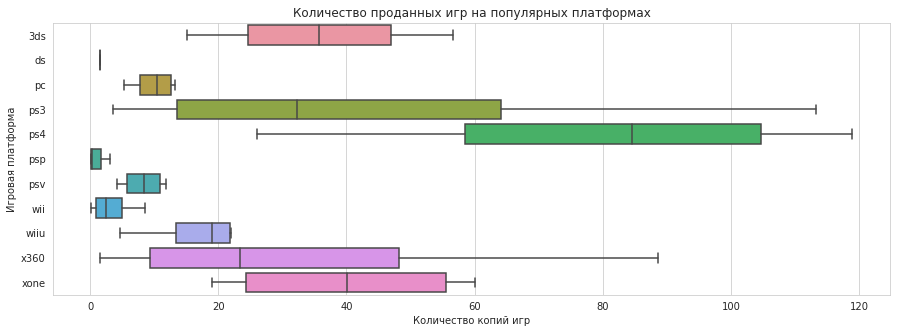

In [64]:
new_era_sales = pd.pivot_table(new_era, index=['platform','year_of_release'],values='world_sales', aggfunc = 'sum')
plt.figure(figsize=(15,5))
sns.boxplot(x="world_sales", y="platform", data=new_era_sales.reset_index())
plt.title('Количество проданных игр на популярных платформах')
plt.ylabel('Игровая платформа')
plt.xlabel('Количество копий игр')
plt.show()

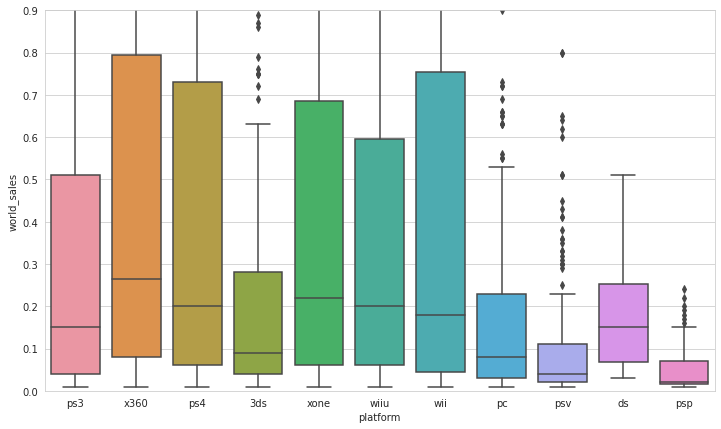

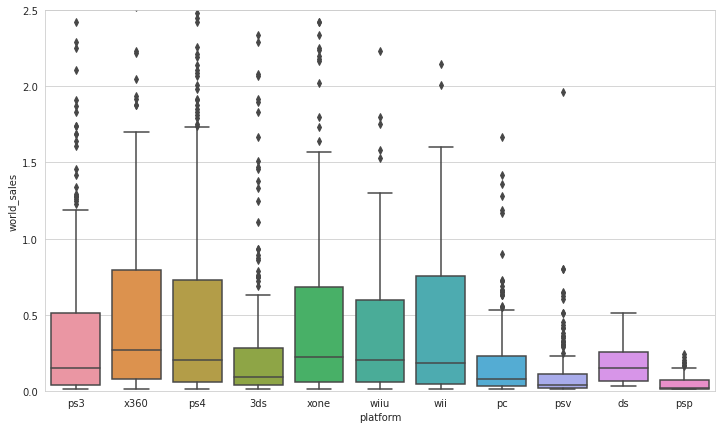

In [65]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=new_era['platform'], y=data['world_sales'])
plt.ylim([0, 0.9])
plt.show()
plt.figure(figsize=(12, 7))
sns.boxplot(x=new_era['platform'], y=data['world_sales'])
plt.ylim([0, 2.5])
plt.show()

Судя по графику у нескольких платформ, а именно у PS3, PS4, Nintendo 3DS, PSV есть большое количество выбросов. Самыми стабильными являются Xbox360, PS4, XOne, Nintendo, Wii-u и  Wii. PSV подходит к закату, а PC платформа показывает себя как менее перспективную чем консольные варианты.

### Посмотрим, как влияют на продажи внутри одной популярной платформы на примере PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

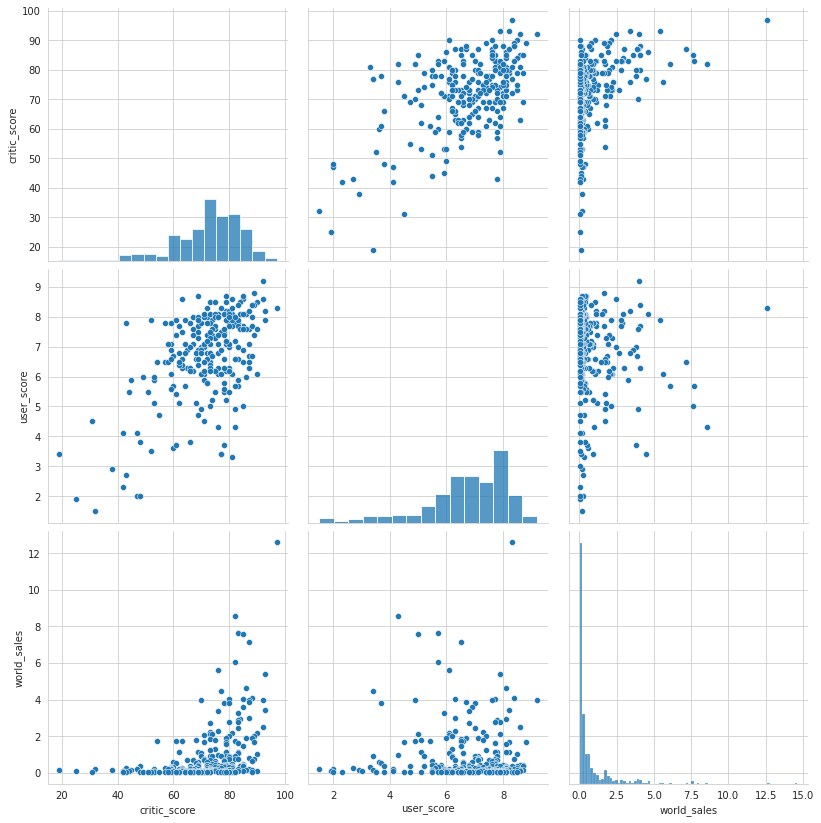

In [66]:
sns.pairplot(new_era[new_era['platform'] == 'ps4'][['critic_score', 'user_score', 'world_sales']])
plt.gcf().set_size_inches(12,12);


In [67]:
new_era[new_era['platform'] == 'ps4']['world_sales'].corr(new_era['critic_score'])

0.406567902061781

In [68]:
new_era[new_era['platform'] == 'ps4']['world_sales'].corr(new_era['user_score'])

-0.031957110204556376

Между оценкой критиков и количеством проданных экземпляров прослеживается умеренная корреляция. Т.е. они имеют влияние на продажи , однако полного контроля над ними не имеют. Что касается пользовательской оценки, то их мнение является не таким гласным и по нашему массиву данных прослеживается отсутствие существенной связи между оценкой пользователя и количеством проданных экземпляров игр. Иными словами их мнение не влияет на продажи.

### Сравним другие платформы с PS4

Возьмем разные сегменты гейминга, главного конкурента в лице XOne, далее PC и консоль прошлого поколения PS3.

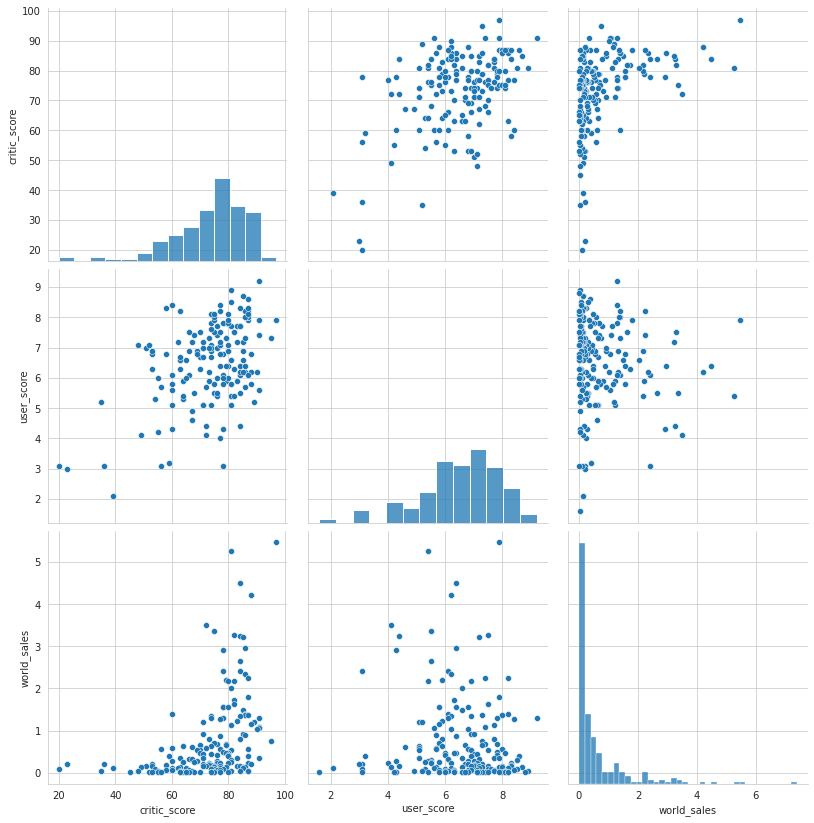

In [69]:
sns.pairplot(new_era[new_era['platform'] == 'xone'][['critic_score', 'user_score', 'world_sales']])
plt.gcf().set_size_inches(12,12);

In [70]:
new_era[new_era['platform'] == 'xone']['world_sales'].corr(new_era['critic_score'])

0.41699832800840175

In [71]:
new_era[new_era['platform'] == 'xone']['world_sales'].corr(new_era['user_score'])

-0.06892505328279412

В случае приставок от Microsoft мы имеем также умеренное влияние критиков, и заметную слабую отрицательную корреляцию  среди пользователей.

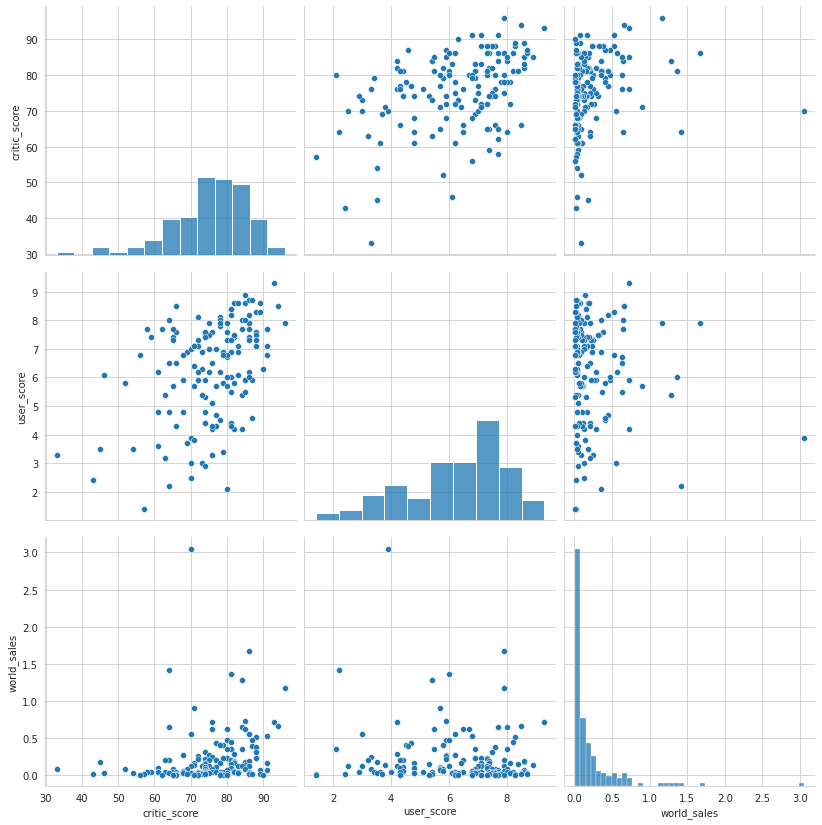

In [72]:
sns.pairplot(new_era[new_era['platform'] == 'pc'][['critic_score', 'user_score', 'world_sales']])
plt.gcf().set_size_inches(12,12);

In [73]:
len(new_era[new_era['platform'] == 'pc'])

189

In [74]:
new_era[new_era['platform'] == 'pc']['world_sales'].corr(new_era['critic_score'])

0.19603028294369382

In [75]:
new_era[new_era['platform'] == 'pc']['world_sales'].corr(new_era['user_score'])

-0.09384186952476739

Количество отзывов пользователей достаточно малое, присутствует большой разброс значений и слабая отрицательная корреляция, однако среди всех платформ, она показывает высшее отрицательное значение. Такая корреляция связана скорее с неудачным игровым опытом и занижением оценок, чем настоящим влиянием на тираж продукта. А вот оценки критиков слабо влияют на цену продукта, хоть и имееют большее количество оценок.

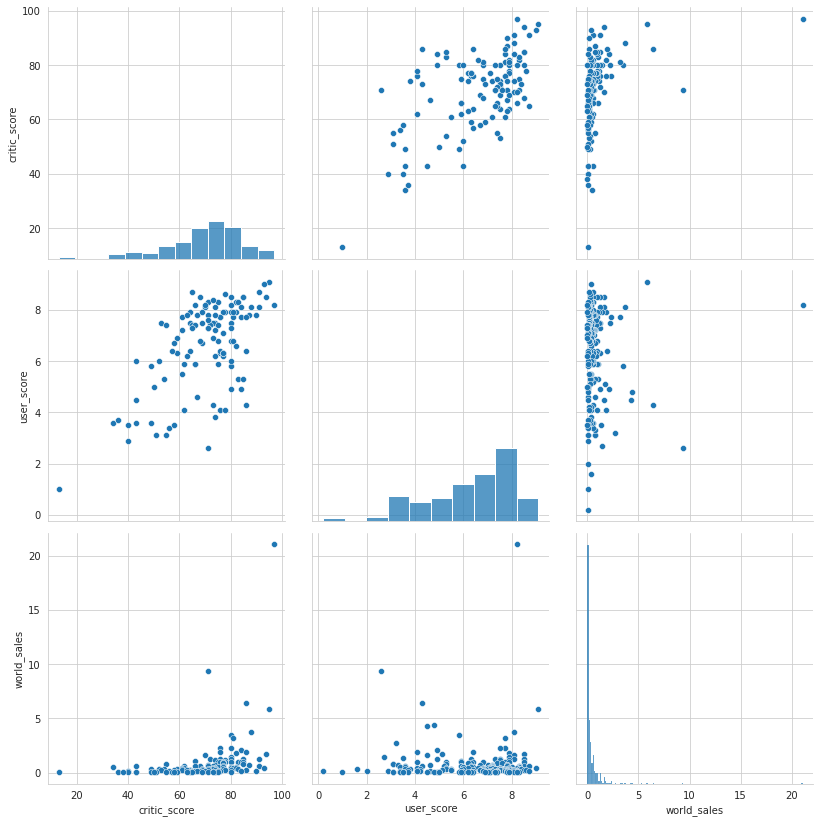

In [76]:
sns.pairplot(new_era[new_era['platform'] == 'ps3'][['critic_score', 'user_score', 'world_sales']])
plt.gcf().set_size_inches(12,12);

In [77]:
new_era[new_era['platform'] == 'ps3']['world_sales'].corr(new_era['critic_score'])

0.3342853393371919

In [78]:
new_era[new_era['platform'] == 'ps3']['world_sales'].corr(new_era['user_score'])

0.0023944027357566925

Консоль предыдущего поколения показывает умеренную корреляцию в случае с критиками, однако здесь мы уже видим что обычный пользователь с коэффициентом корреляции 0.0024 не влияет на продажи игровых продуктов.

Сравнивая найденные значения можно сказать, что по проанализированным продуктам мнение критиков поддерживает среднюю корреляцию и влияние на тираж игр на указанных платформах для гейминга. Меньше всех рядовой пользователь влияет на игровую индустрию консолей PS4. Его оценки не влияют на продажи. Критики же в свою очередь имеют минимальное влияние в сегменте ПК гейминга.

In [79]:
new_era_genre = pd.pivot_table(
    new_era, 
    index='genre', 
    values='world_sales', 
    aggfunc={'world_sales': ['sum', 'mean', 'median']})
#new_era_genre.sort_values('mean')
new_era_genre.sort_values('median')
#display(new_era_genre.sort_values('sum'))

,mean,median,sum
genre,,,
adventure,0.096490,0.030,23.64
puzzle,0.186471,0.060,3.17
strategy,0.180000,0.080,10.08
misc,0.405290,0.100,62.82
simulation,0.350968,0.100,21.76
action,0.420196,0.110,321.87
racing,0.469294,0.120,39.89
fighting,0.441375,0.125,35.31
role-playing,0.499623,0.125,145.89


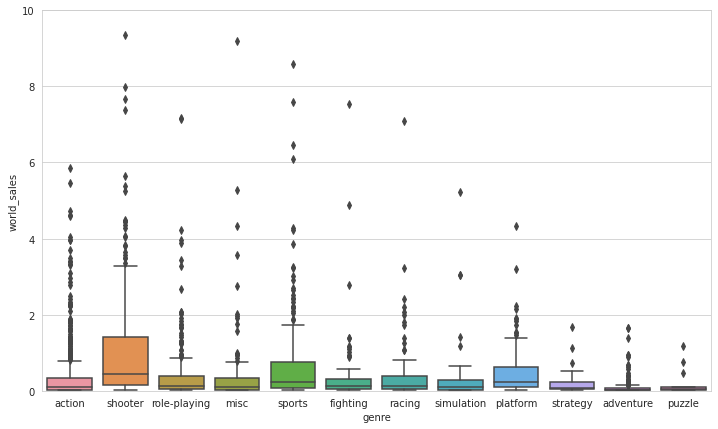

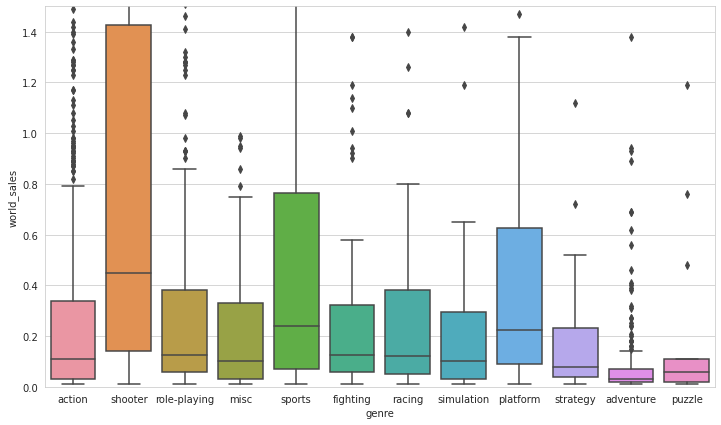

In [80]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=new_era['genre'], y=data['world_sales'])
plt.ylim([0, 10])
plt.show()
plt.figure(figsize=(12, 7))
sns.boxplot(x=new_era['genre'], y=data['world_sales'])
plt.ylim([0, 1.5])
plt.show()

Самые популярные жанры : Action,shooter,sports,role-playing. Здесь все понятно. Экшн - самый распространенный жанр, он вбирает в себя и шутеры и гонки и даже жанр adventure. Там уже происходит деление в зависимости от уклонов самой игры. С шутером тоже все понятно здесь большие вариации киберспорта, они представлены на всех игровых платформах. Так как консольный гейминг самый популярный, то спортивный жанр тоже входит в тройку лучших, все мы знаем такие игры как FIFA и NHL. Симуляторы типа Sims также находят свою аудиторию.  Самый не популярный жанр - puzzle. Это головоломки или симуляторы настольных игр. Тут все понятно, пазлы можно и на столе собирать, это самый скучный жанр, а вот пострелять в монстров ты дома уже не сможешь)

Проанализировав диаграмму размаха, мы можем подтвердить, что Шутер - главный жанр игровой индустрии с наибольшей медианой и соответственно большим успехом у игр этого жанра. Спортивные игры будут вторыми по стабильности, а Экшн в свою очередь имеет большие выбросы с медианным значением даже ниже "role-playing". Это нам говорит что не каждая экшн игра "выстрелит" и будет продаваться.

## Составим портрет пользователя каждого региона

### Для каждого региона определим самые популярные платформы (топ-5).

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16440 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16440 non-null  object 
 1   platform         16440 non-null  object 
 2   year_of_release  16440 non-null  int64  
 3   genre            16440 non-null  object 
 4   na_sales         16440 non-null  float64
 5   eu_sales         16440 non-null  float64
 6   jp_sales         16440 non-null  float64
 7   other_sales      16440 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16440 non-null  object 
 11  world_sales      16440 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


Пойдем по порядку и начнем с региона **North America**

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.50
3ds,38.20
wiiu,29.21
pc,11.11
wii,6.56
psv,5.04


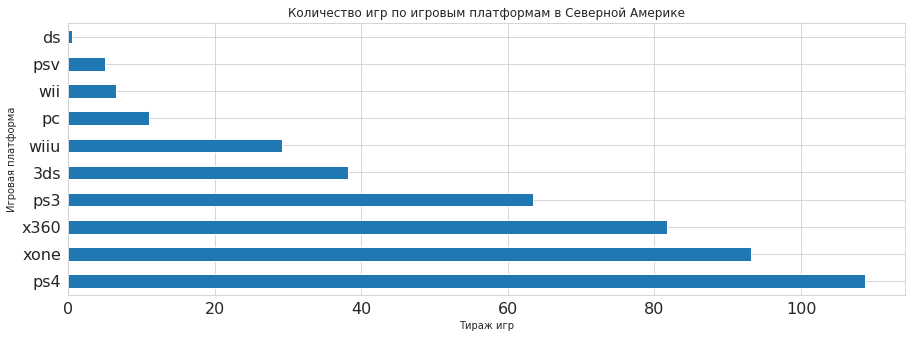

In [82]:
new_era_na = new_era[new_era['na_sales']  > 0]
new_era_na = pd.pivot_table(new_era_na, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(new_era_na)
new_era_na.plot(kind = 'barh', 
                figsize = (15,5), 
                rot = 0, 
                legend = False, 
                fontsize = 16)\
.set(xlabel='Тираж игр',
     ylabel= 'Игровая платформа',
     title = ('Количество игр по игровым платформам в Северной Америке'));

В Северной Америке как ни странно популярен консольный гейминг, жители этого любят товары категории "принес домой, включил, работает". PS4 самая популярная площадка. Nintendo DS (аналог тетриса только более крутой) и PSV популярностью не пользуются. Сами по себе приставки старые - 2003г. и 2011г. соответственно. Игр новых нет, продаж тоже, скорее всего люди если и берут то берут Б/У, ведь нового уже ничего не производят под эти платформы.

,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96
pc,25.36
wiiu,19.85
psv,6.10
wii,5.93


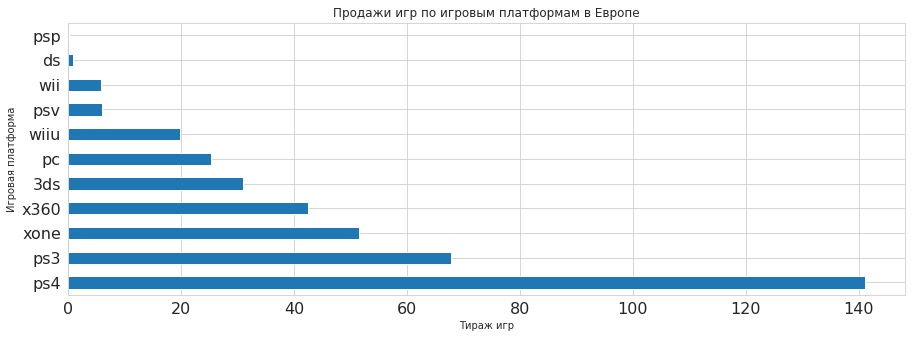

In [83]:
new_era_eu = new_era[new_era['eu_sales'] > 0]
new_era_eu = pd.pivot_table(new_era_eu, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(new_era_eu)
new_era_eu.plot(kind = 'barh', 
                figsize = (15,5), 
                rot = 0, 
                legend = False, 
                fontsize = 16)\
.set(xlabel='Тираж игр',
     ylabel= 'Игровая платформа',
     title = ('Продажи игр по игровым платформам в Европе'));

В Европе с большим отрывом лидирует PS4 и PS3. Здесь любят Сони. А вот psp и Nintendo DS также не любят как и в Америке из-за их "возраста" и поддержки как игр так и ПО. В принципе не считаю Nintendo 3DS и Wiiu портативные приставки выбиваются. В Европе достаточно распростренен ПК гейминг по сравнению с остальными сегментами (более чем в 2 раза превышает Америку).

,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88
psp,3.29
x360,0.51
xone,0.34
wii,0.05


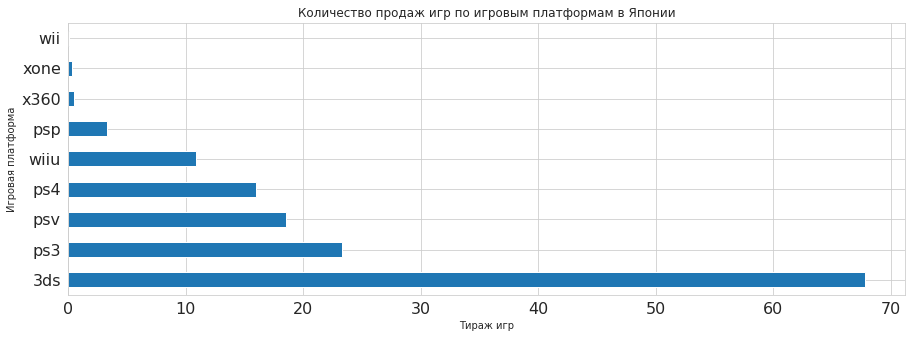

In [84]:
new_era_jp = new_era[new_era['jp_sales'] > 0]
new_era_jp = pd.pivot_table(new_era_jp, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(new_era_jp)
new_era_jp.plot(kind = 'barh', 
                figsize = (15,5), 
                rot = 0, 
                legend = False, 
                fontsize = 16)\
.set(xlabel='Тираж игр',
     ylabel= 'Игровая платформа',
     title = ('Количество продаж игр по игровым платформам в Японии'));
plt.show()

ПК гейминг больше всего распространен в Европе. В Японии его вообще нет как такового, тогда как мобильные приставки (3DS, wiiu, даже престарелую PSV) очень любят в этой Азиатской стране, даже родные PS3 и PS4 вместе взятые проигрывают Nintendo 3DS. Это связано в принципе с самой страной, всем известно, что в Японии маленькие квартиры, бывает что вы работаете вообще в другом городе и можете ездить туда на поезде. Т.е. здесь ценят мобильность и доступность устройств. Поэтому больше половины рынка занимает именно эта категория. PS4 доминирует как в Европе так и в Америке. Отрыв от ближайшего приследователя в лице Xbox One составляет 15,62 млн копий игр. Что является весомым результатом. А в Европе PS4 обгоняет вторую по популярности консоль более чем в два раза по количеству проданных игр.

### Проанализируем самые популярные игровые жанры по регионам (топ-5)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16440 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16440 non-null  object 
 1   platform         16440 non-null  object 
 2   year_of_release  16440 non-null  int64  
 3   genre            16440 non-null  object 
 4   na_sales         16440 non-null  float64
 5   eu_sales         16440 non-null  float64
 6   jp_sales         16440 non-null  float64
 7   other_sales      16440 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16440 non-null  object 
 11  world_sales      16440 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49
platform,18.14
fighting,15.55
racing,12.96
adventure,7.14


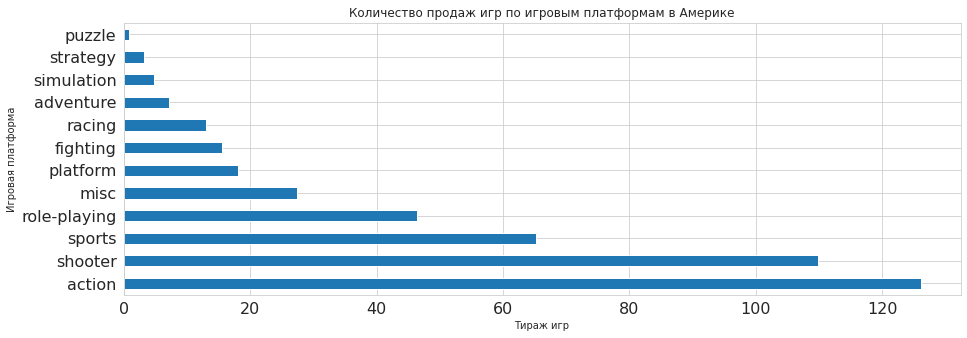

In [86]:
new_era_na_genre = new_era[new_era['na_sales'] > 0]
new_era_na_genre = pd.pivot_table(new_era_na_genre, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(new_era_na_genre)
new_era_na_genre.plot(kind = 'barh', 
                figsize = (15,5), 
                rot = 0, 
                legend = False, 
                fontsize = 16)\
.set(xlabel='Тираж игр',
     ylabel= 'Игровая платформа',
     title = ('Количество продаж игр по игровым платформам в Америке'));
plt.show()

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19
misc,20.04
platform,15.58
simulation,10.92
fighting,8.55


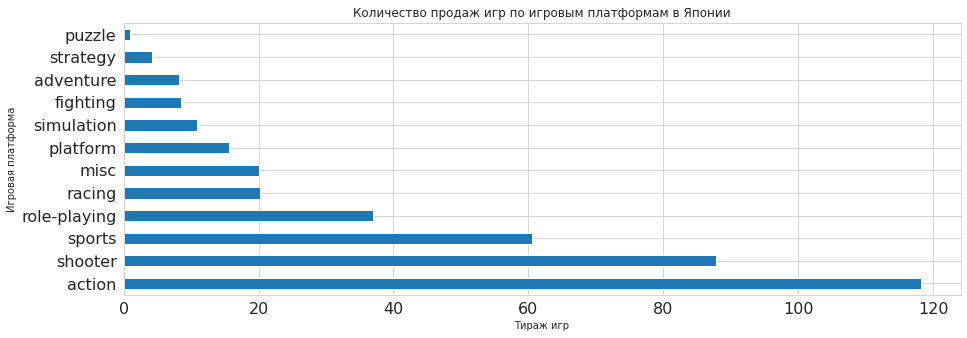

In [87]:
new_era_eu_genre = new_era[new_era['eu_sales'] > 0]
new_era_eu_genre = pd.pivot_table(new_era_eu_genre, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(new_era_eu_genre)
new_era_eu_genre.plot(kind = 'barh', 
                figsize = (15,5), 
                rot = 0, 
                legend = False, 
                fontsize = 16)\
.set(xlabel='Тираж игр',
     ylabel= 'Игровая платформа',
     title = ('Количество продаж игр по игровым платформам в Японии'));
plt.show()

,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61
adventure,5.82
sports,5.41
platform,4.79
simulation,4.52


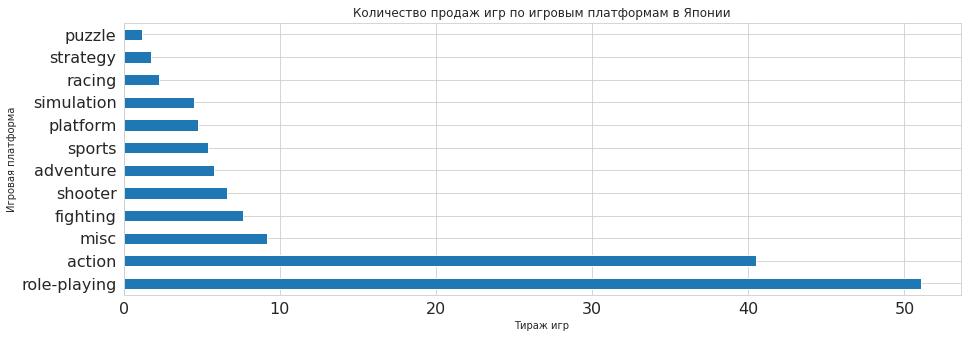

In [88]:
new_era_jp_genre = new_era[new_era['jp_sales'] > 0]
new_era_jp_genre = pd.pivot_table(new_era_jp_genre, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(new_era_jp_genre)
new_era_jp_genre.plot(kind = 'barh', 
                figsize = (15,5), 
                rot = 0, 
                legend = False, 
                fontsize = 16)\
.set(xlabel='Тираж игр',
     ylabel= 'Игровая платформа',
     title = ('Количество продаж игр по игровым платформам в Японии'));
plt.show()

In [89]:
new_era_pivot_na = new_era.pivot_table(index=['platform'],
                  values='na_sales',
                  aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).reset_index()
new_era_pivot2 = new_era.pivot_table(index=['platform'],
                  values='na_sales',
                  aggfunc='sum').sort_values(by='na_sales', ascending=False).tail(5).reset_index()
new_era_pivot_na.loc[len(new_era_pivot_na.index )] = ['другие', (new_era_pivot2['na_sales'].sum())]
new_era_pivot_na = new_era_pivot_na.groupby(['platform']).sum ()

In [90]:
new_era_pivot_eu = new_era.pivot_table(index=['platform'],
                  values='eu_sales',
                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).reset_index()
new_era_pivot2 = new_era.pivot_table(index=['platform'],
                  values='eu_sales',
                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).tail(5).reset_index()
new_era_pivot_eu.loc[len(new_era_pivot_eu.index )] = ['другие', (new_era_pivot2['eu_sales'].sum())]
new_era_pivot_eu = new_era_pivot_eu.groupby(['platform']).sum ()

In [91]:
new_era_pivot_jp = new_era.pivot_table(index=['platform'],
                  values='jp_sales',
                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).reset_index()
new_era_pivot2 = new_era.pivot_table(index=['platform'],
                  values='jp_sales',
                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).tail(5).reset_index()
new_era_pivot_jp.loc[len(new_era_pivot_jp.index )] = ['другие', (new_era_pivot2['jp_sales'].sum())]
new_era_pivot_jp = new_era_pivot_jp.groupby(['platform']).sum ()

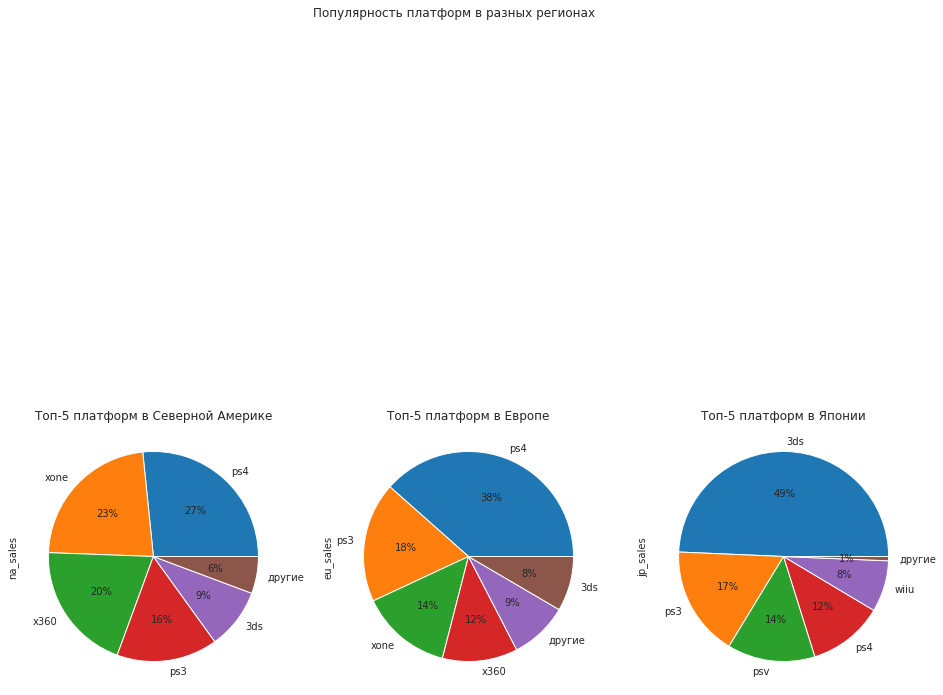

In [92]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16, 16))
fig.suptitle('Популярность платформ в разных регионах')
axes[0].set_title('Топ-5 платформ в Северной Америке')
axes[1].set_title('Топ-5 платформ в Европе')
axes[2].set_title('Топ-5 платформ в Японии')
 
new_era_pivot_na.sort_values(by='na_sales', ascending=False)\
.plot(ax=axes[0],
      kind='pie',
      y='na_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
 
new_era_pivot_eu.sort_values(by='eu_sales', ascending=False)\
.plot(ax=axes[1],
      kind='pie',
      y='eu_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' });
 
new_era_pivot_jp.sort_values(by='jp_sales', ascending=False)\
.plot(ax=axes[2],
      kind='pie',
      y='jp_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white' });

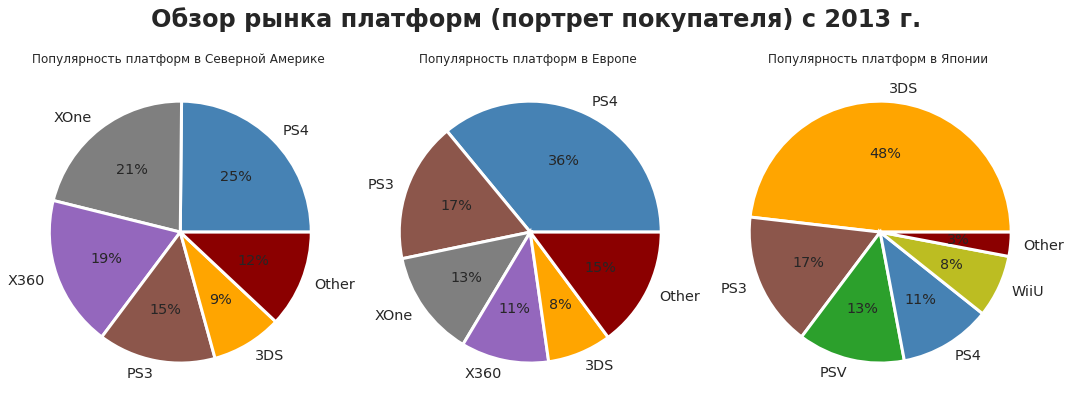

In [93]:
new_era_pivot_jp = new_era.pivot_table(index=['genre'],
                  values='jp_sales',
                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5).reset_index()
new_era_pivot2 = new_era.pivot_table(index=['genre'],
                  values='jp_sales',
                  aggfunc='sum').sort_values(by='jp_sales', ascending=False).tail(5).reset_index()
new_era_pivot_jp.loc[len(new_era_pivot_jp.index )] = ['другие', (new_era_pivot2['jp_sales'].sum())]
new_era_pivot_jp = new_era_pivot_jp.groupby(['genre']).sum ()

In [94]:
new_era_pivot_na = new_era.pivot_table(index=['genre'],
                  values='na_sales',
                  aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5).reset_index()
new_era_pivot2 = new_era.pivot_table(index=['genre'],
                  values='na_sales',
                  aggfunc='sum').sort_values(by='na_sales', ascending=False).tail(5).reset_index()
new_era_pivot_na.loc[len(new_era_pivot_na.index )] = ['другие', (new_era_pivot2['na_sales'].sum())]
new_era_pivot_na = new_era_pivot_na.groupby(['genre']).sum ()

In [95]:
new_era_pivot_eu = new_era.pivot_table(index=['genre'],
                  values='eu_sales',
                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5).reset_index()
new_era_pivot2 = new_era.pivot_table(index=['genre'],
                  values='eu_sales',
                  aggfunc='sum').sort_values(by='eu_sales', ascending=False).tail(5).reset_index()
new_era_pivot_eu.loc[len(new_era_pivot_eu.index )] = ['другие', (new_era_pivot2['eu_sales'].sum())]
new_era_pivot_eu = new_era_pivot_eu.groupby(['genre']).sum ()
new_era_pivot_eu

,eu_sales
genre,
action,118.13
racing,20.19
role-playing,36.97
shooter,87.86
sports,60.52
другие,32.94


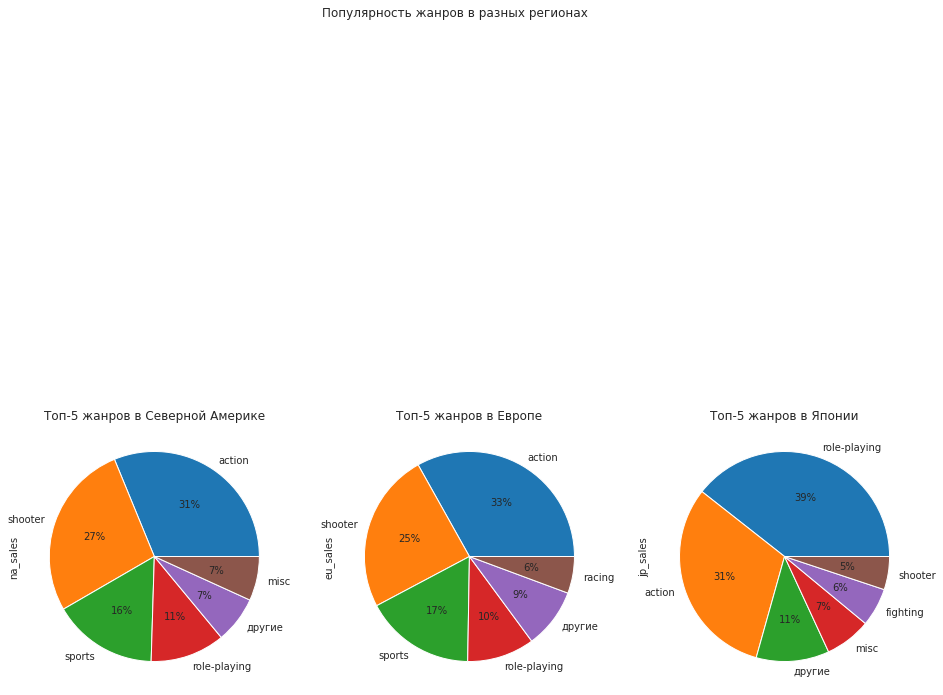

In [96]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16, 16))
fig.suptitle('Популярность жанров в разных регионах')
axes[0].set_title('Топ-5 жанров в Северной Америке')
axes[1].set_title('Топ-5 жанров в Европе')
axes[2].set_title('Топ-5 жанров в Японии')
 
new_era_pivot_na.sort_values(by='na_sales', ascending=False)\
.plot(ax=axes[0],
      kind='pie',
      y='na_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white' });
        
new_era_pivot_eu.sort_values(by='eu_sales', ascending=False)\
.plot(ax=axes[1],
      kind='pie',
      y='eu_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white' });
 
new_era_pivot_jp.sort_values(by='jp_sales', ascending=False)\
.plot(ax=axes[2],
      kind='pie',
      y='jp_sales',
      autopct='%1.0f%%',
      legend=False,
      wedgeprops = {'linewidth' : 1, 'edgecolor' : 'white' });

**Рейтинг жанров (по убыванию):**
<br>
-Топ  по Северной Америке: Action(31%), Shooter(27%), Sports(16%), Role-Playing(11%) и Misc(7%), остальные жанры занимают 7% рынка<br>
-Топ по Европейскому региону : Action(33%), Shooter(25%), Sports(17%), Role-Playing(10%), Racing(6%), остальные жанры занимают 9% рынка<br>
-Топ по Японии: Role-Playing(39%), Action(31%), Misc(7%), Fighting(6%), Shooter(5%), остальные жанры занимают 6% рынка<br>
<br>
Ожидаемо во всех регионах жанры стратегии и головоломок занимают последние места. Япония со своим консольным геймингом пересекается только в жанре Action и то потому что это самый распространенный жанр. В Японии популярность набрал жанр RPG он занимает практически половину игрового рынка.<br>
В Америке в ТОП попал жанр miscellaneous game (Misc) - игры в категории skill-and-action, которые не попадают под основные категории к action, racing или sports. Такие игры выпускают редко, т.к. это смесь всех перечисленных жанров, но не один особо не выделяется.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

,na_sales
rating,
M,165.21
no_rating,89.42
E,79.05
E10+,54.24
T,49.79


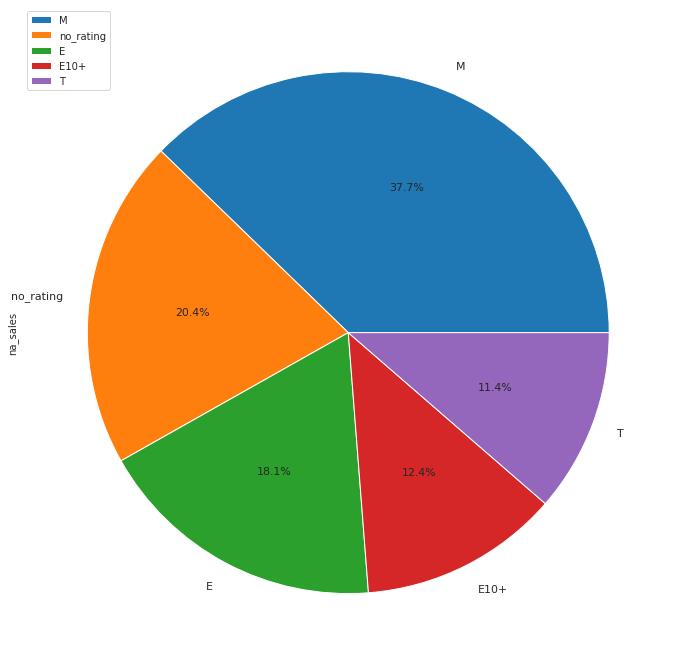

In [97]:
new_era_na_esrb = new_era[new_era['na_sales'] > 0]
new_era_na_esrb = pd.pivot_table(new_era_na_esrb, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
display(new_era_na_esrb)
new_era_na_esrb.plot(kind='pie',
                      subplots=True, 
                      fontsize = 11, autopct='%1.1f%%', figsize=(12, 12))
plt.show()

,eu_sales
rating,
M,108.33
E,58.26
no_rating,55.55
T,23.95
E10+,15.19


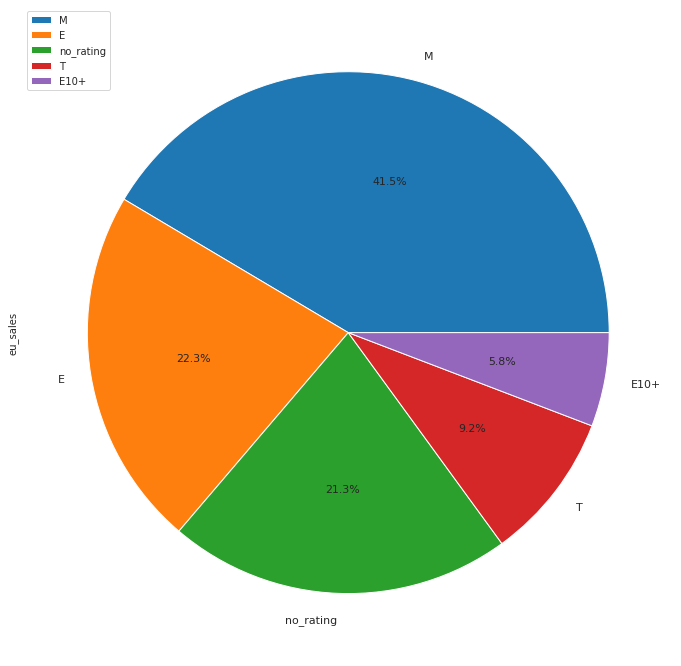

In [98]:
new_era_eu_esrb = new_era[new_era['jp_sales'] > 0]
new_era_eu_esrb = pd.pivot_table(new_era_eu_esrb, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
display(new_era_eu_esrb)
new_era_eu_esrb.plot(kind='pie',
                      subplots=True, 
                      fontsize = 11, autopct='%1.1f%%', figsize=(12, 12))
plt.show()

,jp_sales
rating,
no_rating,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


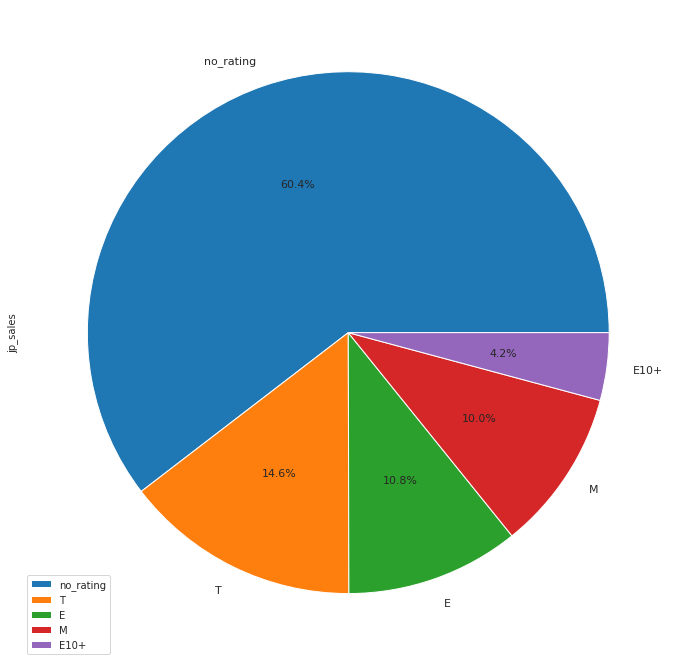

In [99]:
new_era_jp_esrb = new_era[new_era['jp_sales'] > 0]
new_era_jp_esrb = pd.pivot_table(new_era_jp_esrb, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
display(new_era_jp_esrb)
new_era_jp_esrb.plot(kind='pie',
                      subplots=True, 
                      fontsize = 11, autopct='%1.1f%%', figsize=(12, 12))
plt.show()

Рейтинг возраста влияет по каждому региону.

В Америке и Европе схожие ситуации больше половины занимает рейтинг «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Это означает, что эти рынки ориентированы на взрослых пользователей. Плюс если вспомним жанры Шутеры и Экшн, то здесь все становится понятно. Стрелялки, монстры и прочие прелести в топе :). Здесь игры без рейтинга практически на одном уровне в Европе - 21.3%, в регионе Северной Америки - 20,4%.<br>

Игры без возрастного рейтинга в Японии ТОП-1.
Игры с рейтингом:
В Японии лидириуют игры с возрастным «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Компании хотят распространить свое влияние на новое поколение плюс жанр role_playing(RPG) и специфика портативного гейминга также дают о себе знать.

### Итоговый портрет игрока в зависимости от региона:

Американский игрок, предпочитающий играть на консолях нового поколения (PS4 или же Xbox One) в шутеры или экшн с ограничением возраста 17+.<br>

Европеец - предпочитает консоль от Sony(PS4 в большинстве своем) играет в экшн или шутеры с ограничением возраста 17+.

Японец с возрастной категорией от 13-ти лет предпочитает мобильный гейминг на Nintendo или полноценную консоль PS3. Любимый жанр - RPG или шутер.

## Проверим гипотезы

### Проверим средние пользовательские рейтинги платформ Xbox One и PC. Равны ли они?


Цель - узнать равны ли рейтинги пользователей Xbox One и PC.
Нулевая гипотеза H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Альтернативная гипотеза H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются.<br>

Определим пороговое значение alpha как общепринятое в размере 0.05. Также необходимо избавиться от пропусков иначе метод работать не будет.

In [100]:
sample_1 = new_era[new_era['platform'] == 'xone']['user_score'].dropna()

In [101]:
display(sample_1.describe())
print('Дисперсия равна:',np.var(sample_1,ddof=1))

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Дисперсия равна: 1.9069968429360695


In [102]:
sample_2 = new_era[new_era['platform'] == 'pc']['user_score'].dropna()

In [103]:
display(sample_2.describe())
print('Дисперсия равна:',np.var(sample_2,ddof=1))

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Дисперсия равна: 3.035892752408882


Так как наши дисперсии и выборки не равны добавим equal_var=False

In [104]:
alpha = .05
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Уровень доверия – вероятность не отвергнуть верную нулевую гипотезу. Проверить нулевую гипотезу на уровне значимости 5% и проверить нулевую гипотезу на уровне доверия 95% – это одно и то же. По имеющимся у нас данным, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

На практике гипотезы проверяются с помощью расчёта p-value (от англ. p, probability  — «вероятность», value — «значение») — вероятности при верной нулевой гипотезе получить наблюдаемое значение или более удалённое от того, которое предположили. Чем меньше p-value, тем меньше оказалась вероятность хвостов, «отрубленных» наблюдаемым значением. Или хвоста, если альтернативная гипотеза односторонняя.

### Проверим являются ли средние пользовательские рейтинги жанров Action и Sports разными.

Сформируем нулевую и альтернативную гипотезы.<br>

Нулевая гипотеза H₀ - Средние пользовательские рейтинги жанров action и sports одинаковые.<br>
Альтернативная гипотеза H₁ - Средние пользовательские рейтинги жанров action и sports разные.<br>

Значение alpha оставляем такое же как общепринятое в размере 0.05. Здесь также необходимо избавиться от пропусков иначе метод работать не будет. Так как мы работаем с выборками, установим параметр ddof=1.

In [106]:
sample_3 = new_era[new_era['genre'] == 'action']['user_score'].dropna()

In [107]:
display(sample_3.describe())
print('Дисперсия равна:',np.var(sample_3,ddof=1))

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Дисперсия равна: 1.7693609042482705


In [108]:
sample_4 = new_era[new_era['genre'] == 'sports']['user_score'].dropna()

In [109]:
display(sample_4.describe())
print('Дисперсия равна:',np.var(sample_4,ddof=1))

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Дисперсия равна: 3.180612814465409


Так как наши дисперсии и выборки не равны добавим в Т-тест equal_var = False

In [110]:
results2 = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)
print('p-значение:', results2.pvalue)
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Уровень доверия – вероятность не отвергнуть верную нулевую гипотезу. Проверив нулевую гипотезу на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Из этого можно предположить, что рейтинги пользователей в жанре Спорт и Экшн разные.

Нулевая гипотеза по определению должна быть со знаком равенства. В альтернативную мы прописываем необходимое нам далее условие. В обоих случаях берем ttest_ind потому что значения независимы. Если бы значения пересекались или были зависимы, тогда нам бы подошел стат. тест ttest_rel.

## Итоговый вывод

Изучены предоставленные данные. Названия приведены нижнему регистру, тип данных изменен. В результате обработки были удалены 1,64 % данных, что не критично (5% считается нормой). Были даны ответы на поставленные вопросы, комментарии даны по ходу исследования.
Самая прибыльная консоль PS4, так же она является самой популярной у пользователей всего мира, кроме Японии. В Японии процветает портативный гейминг во главе с Nintendo 3DS и консолью прошлого поколения PS3 у тех, кто не перебрался на портативные устройства.<br>
В ходе исследования было выявлено, что продажи игр зависят от платформы, жанра, а также рейтинга критиков.<br>
В свою очередь жанр и игровая платформа зависят от региона. В Америке действует принцип, что вещь должна работать сразу. В Японии маленькие квартирки,тяжело что-то разместить и они много передвигаются до работы. Европейцы более лояльны к ПК-геймингу и не боятся тратить больше денег (ПК гейминга в Европе продает игр в 2 раза чем в Северной Америке)

Рекомендации для закупок игровых продуктов:
- Стоит обратить внимание на игровые платформы PS4, Xbox One, Nintendo 3DS. 
- В первую очередь рынок консольных игр более прибыльный. 
- Рекомендуемая платформа - PS4/Xone. PlayStation 4 остается на первом месте по приобретению игр среди всех гейминг устройств на рынке. Так как в конце 2016 - начале 2017 в продаже появляется новая консоль PS4 Pro. Получится охватить сразу два продукта (PS4 и Про версию), так как у них одна платформа. Продажи игр для PlayStation 4 в Европе опережают ближайшего конкурента в 2 раза!
- Определить целевую аудиторию и регион сбыта (для мобильного гейминга рекомендуем - Азию, для консольного - Европа(PS4) и Америка (PS4 или Xbox One)
- Согласно исследованию более 50% игр в Америке и Европе составляют игры с возрастным ограничением "М" (17+). Следовательно необходимо выбрать своей аудиторией пользователей старше 17 лет.
- Самые продаваемые игры - экшн, следом жанр шутер.
- Следовательно стоит сфокусироваться на закупках экшенов и шутеров
- Шутеры более стабильны и чаще "выстреливают" в плане продаж. Жанр Экшн в свою очередь имеет очень большую игровую базу, где есть из чего выбрать и продажи имеют большой разброс.